# Exploratory Data Analysis

## Importing Dataset

In [1]:
%%capture
! pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(url)
pd.set_option("display.max_columns",None)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<p> Lets check the corelation between potential predictor columns based on domain knowledge. </p>

In [3]:
## Correlation

df[["bore", "stroke", "compression-ratio", "horsepower", "engine-size", "stroke", "price" ]].corr()

,bore,stroke,compression-ratio,horsepower,engine-size,stroke,price
bore,1.000000,-0.055390,0.001263,0.566936,0.572609,-0.055390,0.543155
stroke,-0.055390,1.000000,0.187923,0.098462,0.209523,1.000000,0.082310
compression-ratio,0.001263,0.187923,1.000000,-0.214514,0.028889,0.187923,0.071107
horsepower,0.566936,0.098462,-0.214514,1.000000,0.822676,0.098462,0.809575
engine-size,0.572609,0.209523,0.028889,0.822676,1.000000,0.209523,0.872335
stroke,-0.055390,1.000000,0.187923,0.098462,0.209523,1.000000,0.082310
price,0.543155,0.082310,0.071107,0.809575,0.872335,0.082310,1.000000


## Linear relationship

Text(0.5,1,'Regression plot engine-size vs price')

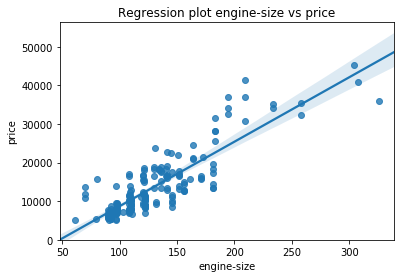

In [4]:
## Checking for engine size as potential predictor variable for price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)
plt.title("Regression plot engine-size vs price")

<p> Here, engine-size seems to have <b>positive linear relationship </b> with price which means, as engine size increases the price of the car also increases. Hence engine size is pretty good predictor of car price. </p>

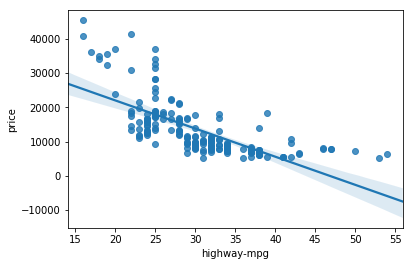

In [5]:
sns.regplot(x='highway-mpg',y='price',data=df)

<p> higway-mpg has a <b> strong negative </b> linear relationship with price. </p>

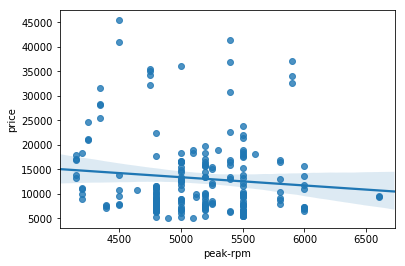

In [6]:
sns.regplot(x='peak-rpm',y='price',data=df)

<p> peak-rpm has a very <b> weak </b> linear relationship with price and hence it is not a reliable variable for predicting price.

## Categorical variables

<p> A good way to visualize categorical variable is by using Box plots. </p>

Text(0.5,1,'Box plot: body-style vs price')

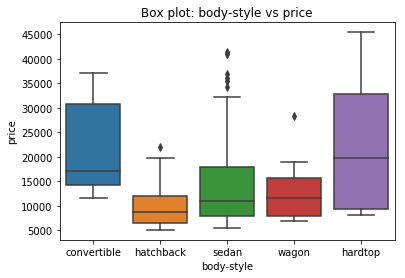

In [7]:
sns.boxplot(x='body-style', y='price', data=df)
plt.title("Box plot: body-style vs price")

<p> We can see from the plot that distributions of price has a significant overlap among different categories hence body-style would not be a good predictor of price. </p>

Text(0.5,1,'Box plot: engine-location vs price')

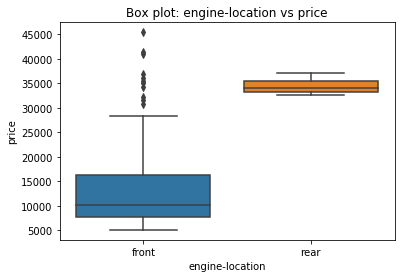

In [8]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.title("Box plot: engine-location vs price")

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

 Let's examine "drive-wheels" and "price".

Text(0.5,1,'Box plot: drive-wheels vs price')

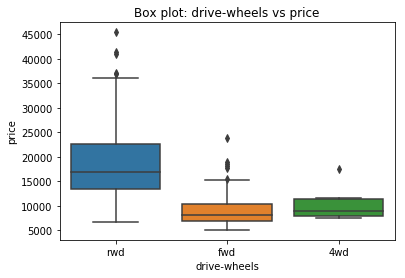

In [9]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.title("Box plot: drive-wheels vs price")

<p>Here we see that the distribution of price for rwd categorie differs; as such drive-wheels could potentially be a predictor of price.</p>

## Descriptive statistical analysis

In [10]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [11]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


###  Value Counts

In [18]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels':'value_counts'}, inplace = True)
drive_wheel_counts.index.name = 'drive-wheels'
drive_wheel_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [20]:
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location':'value_counts'}, inplace = True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of engine location, we can say that this will not be a good predictor of car price as we have only three values for rear engine location.

## Average Prices

In [28]:
df_group_one = df[['drive-wheels','body-style','price']]
grouped_test_1 = df_group_one.groupby(['drive-wheels'], as_index = False).mean()
grouped_test_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


It seems that on an average, the price of rear wheel drive cars are more expensive than four wheel or front wheel drive cars

In [29]:
grouped_test_2 = df_group_one.groupby(['drive-wheels','body-style'], as_index = False).mean()
grouped_test_2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [33]:
## Pivot table
grouped_test_2_pivot = grouped_test_2.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_test_2_pivot = grouped_test_2_pivot.fillna(0)
grouped_test_2_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

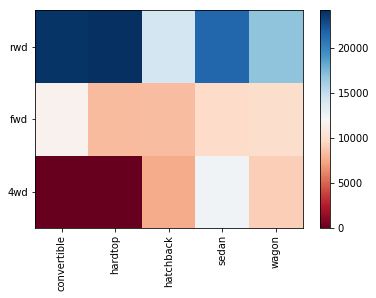

In [41]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_test_2_pivot, cmap='RdBu')

#label names
row_labels = grouped_test_2_pivot.columns.levels[1]
col_labels = grouped_test_2_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_test_2_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_test_2_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Pearson Correlation and P-Value

### Wheel-base vs Price

Let's calculate the Pearson Correlation and P-value of 'wheel-base' and 'price'

In [44]:
from scipy import stats
pearson_corr, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print('The Pearson correlation coefficient is', pearson_corr, 'with P-Value of', p_value)

The Pearson correlation coefficient is 0.5846418222655081 with P-Value of 8.076488270732955e-20


Since P-Value id less than 0.001 the Pearson Correlation Coefficient is statistically significant. Although, the linear relationship between between wheel base and price is not strong

### Length vs Price

Let's calculate the Pearson Correlation and P-value of 'wheel-base' and 'price'

In [45]:
pearson_corr, p_value = stats.pearsonr(df['length'],df['price'])
print('The Pearson correlation coefficient is', pearson_corr, 'with P-Value of', p_value)

The Pearson correlation coefficient is 0.690628380448364 with P-Value of 8.016477466159053e-30


Since P-Value id less than 0.001 the Pearson Correlation Coefficient is statistically significant. Although, the linear relationship between between length and price is moderately strong

### Width vs Price

Let's calculate the Pearson Correlation and P-value of 'width' and 'price'

In [46]:
pearson_corr, p_value = stats.pearsonr(df['width'],df['price'])
print('The Pearson correlation coefficient is', pearson_corr, 'with P-Value of', p_value)

The Pearson correlation coefficient is 0.7512653440522674 with P-Value of 9.200335510481426e-38


Since P-Value id less than 0.001 the Pearson Correlation Coefficient is statistically significant. The linear relationship between between width and price is quite strong

### Engine-size vs Price

Let's calculate the Pearson Correlation and P-value of 'Engine-size' and 'price'

In [47]:
pearson_corr, p_value = stats.pearsonr(df['engine-size'],df['price'])
print('The Pearson correlation coefficient is', pearson_corr, 'with P-Value of', p_value)

The Pearson correlation coefficient is 0.8723351674455185 with P-Value of 9.265491622197996e-64


Since P-Value id less than 0.001 the Pearson Correlation Coefficient is statistically significant. The linear relationship between between Engine-size and price is very strong

## Conclusion

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>